In [1]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from utils import *

# preprocess and load data
filepath = 'train_data.pkl'
if not os.path.exists(filepath):
    general_process(output_filepath=filepath)
with open(filepath, 'rb') as fin:
    df = pickle.load(fin)
df.head(1)

,type_material,temp,freq,core_loss,type_waveform,flux_density
0,1,25,50030,1997.95525,正弦波,"[0.000212759, 0.000389496, 0.00056608, 0.00074..."


In [13]:
# for all waveform, max-min normalize to [-1, 1], for better classification
df['flux_density'] = df['flux_density'].apply(
    lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))

# 问题一： 励磁波形分类

输入一个长度为1024的序列，输出一个类别（正弦波0、三角波1、梯形波2）

In [16]:
df[df['type_waveform'] == '梯形波'].head(1)

,type_material,temp,freq,core_loss,type_waveform,flux_density
2370,1,25,50060,12568.70593,梯形波,"[0.23320246532160752, 0.23892481148874184, 0.2..."


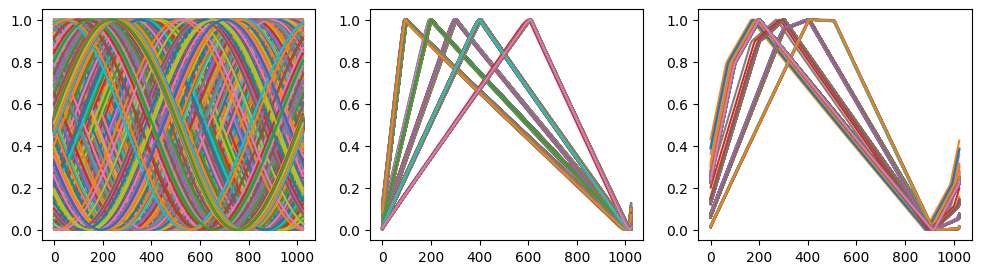

In [24]:
# iterate over the range with a step of 10, ensuring the index is within bounds
fig, axes = plt.subplots(1, 3, figsize=(12, 3))
for type_waveform, ax in zip(['正弦波', '三角波', '梯形波'], axes):
    for i in range(1, min(10000, len(df[df['type_waveform'] == type_waveform])), 1):
        ax.plot(df[df['type_waveform'] == type_waveform]['flux_density'].iloc[i])

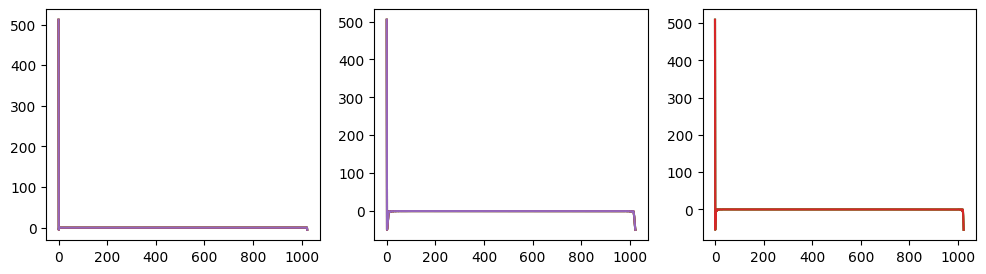

In [34]:
fig, axes = plt.subplots(1, 3, figsize=(12, 3))
for type_waveform, ax in zip(['正弦波', '三角波', '梯形波'], axes):
    for i in range(1, min(10000, len(df[df['type_waveform'] == type_waveform])), 1000):
        ax.plot(np.fft.fft(df[df['type_waveform'] == type_waveform]['flux_density'].iloc[1]))

/Users/durui/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


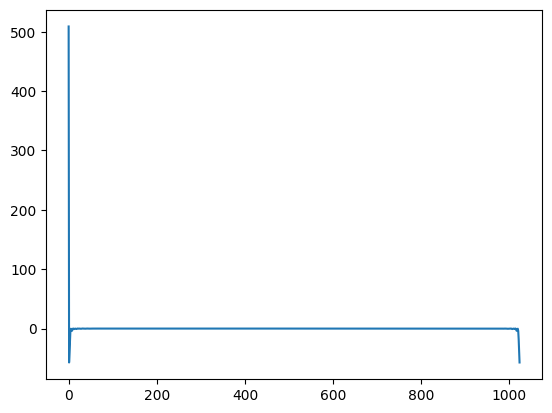

In [7]:
sequence = df[df['type_waveform'] == '梯形波']['flux_density'].iloc[0]
slope = np.diff(sequence)
(slope * 1e4)[:20]

array([6.92509, 6.91329, 6.90473, 6.91396, 6.89908, 6.88197, 6.90877,
       6.90087, 6.8954 , 6.89705, 6.88168, 6.88395, 6.87524, 6.87645,
       6.87812, 6.85196, 6.84817, 6.87036, 6.87905, 6.86585])

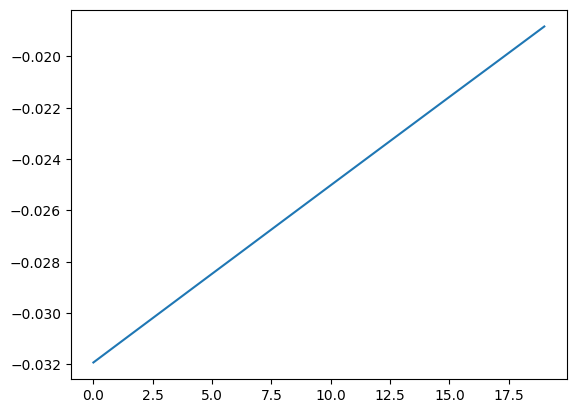

In [11]:
plt.plot(sequence[:20])

In [75]:
# calculate the unique slope values in the sequence with a tolerance
sequence = df[df['type_waveform'] == '梯形波']['flux_density'].iloc[0]
slope = np.diff(sequence) * 1e4
# round the slope values to a certain number of decimal places to account for small differences
rounded_slope = np.round(slope, decimals=3)
# count unique slope values
unique_slope_values = np.unique(rounded_slope)
len(unique_slope_values)

360

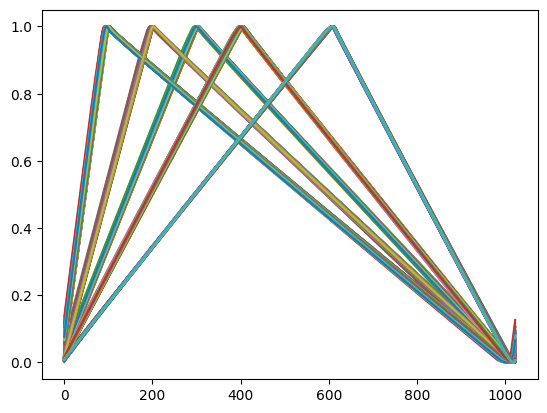

In [20]:
# iterate over the range with a step of 10, ensuring the index is within bounds
for i in range(1, min(10000, len(df[df['type_waveform'] == '三角波'])), 5):
    plt.plot(df[df['type_waveform'] == '三角波']['flux_density'].iloc[i])

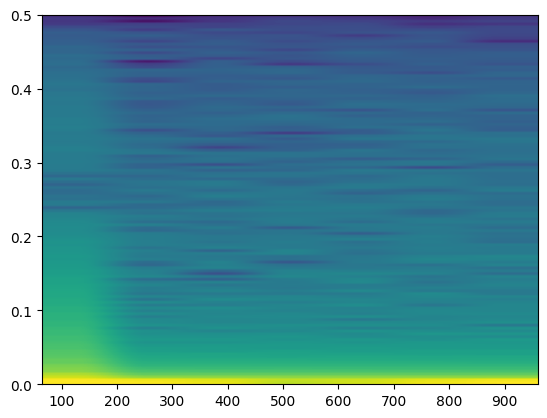

In [38]:
plt.specgram(df[df['type_waveform'] == '三角波']['flux_density'].iloc[0], Fs=1)
plt.show()

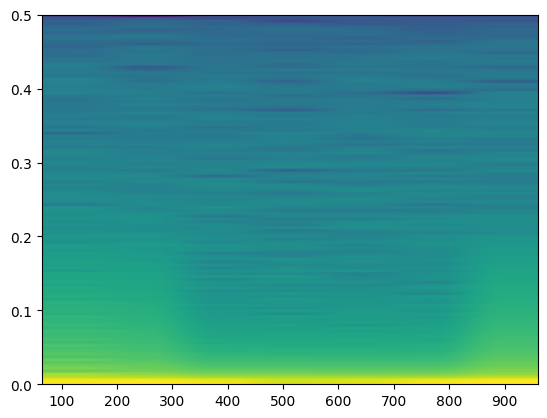

In [39]:
plt.specgram(df[df['type_waveform'] == '正弦波']['flux_density'].iloc[0], Fs=1)
plt.specgram(df[df['type_waveform'] == '梯形波']['flux_density'].iloc[0], Fs=1)
plt.show()

In [31]:
df_sample = df.sample(frac=0.1, random_state=1)
df_sample.to_pickle('demo.pkl')

In [32]:
df_sample

,type_material,temp,freq,core_loss,type_waveform,0,flux_density
5491,2,25,158750,76872.063040,梯形波,NaN,"[nan, -0.031429734, -0.03072461, -0.030026205,..."
3358,1,90,251240,12038.459880,梯形波,-0.012717,"[-0.012717071, -0.012432538, -0.012150708, -0...."
2641,1,50,56160,20591.213130,梯形波,-0.045033,"[-0.045033225, -0.044047581, -0.043065126, -0...."
6295,2,90,316450,55887.824120,梯形波,NaN,"[nan, -0.028520961, -0.028213464, -0.027907468..."
11042,4,70,112170,32596.455650,三角波,-0.044219,"[-0.0442194, -0.043235718, -0.04226253, -0.041..."
...,...,...,...,...,...,...,...
3570,2,50,398100,53091.371120,正弦波,NaN,"[nan, 9.28e-05, 0.000285546, 0.000478234, 0.00..."
2690,1,50,99970,7829.087814,梯形波,-0.022670,"[-0.022669717, -0.022174313, -0.02168233, -0.0..."
11351,4,90,177890,82288.229620,三角波,-0.043631,"[-0.043631311, -0.042619081, -0.041619808, -0...."
3380,1,90,282480,67841.204870,梯形波,-0.025358,"[-0.025357883, -0.024798734, -0.02424312, -0.0..."
